In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

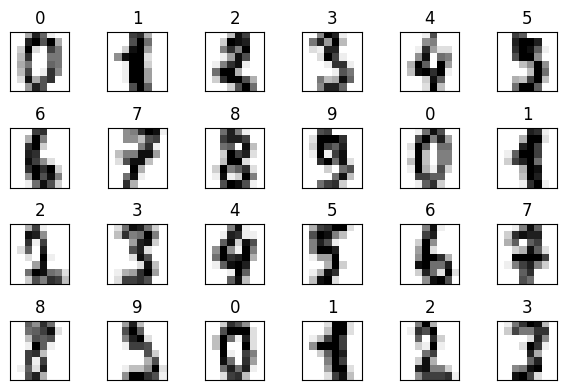

In [2]:
# Task 1
digits = load_digits()

figure1, axes1 = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for ax, image, label in zip(axes1.ravel(), digits.images[:24], digits.target[:24]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
plt.tight_layout()
plt.show()

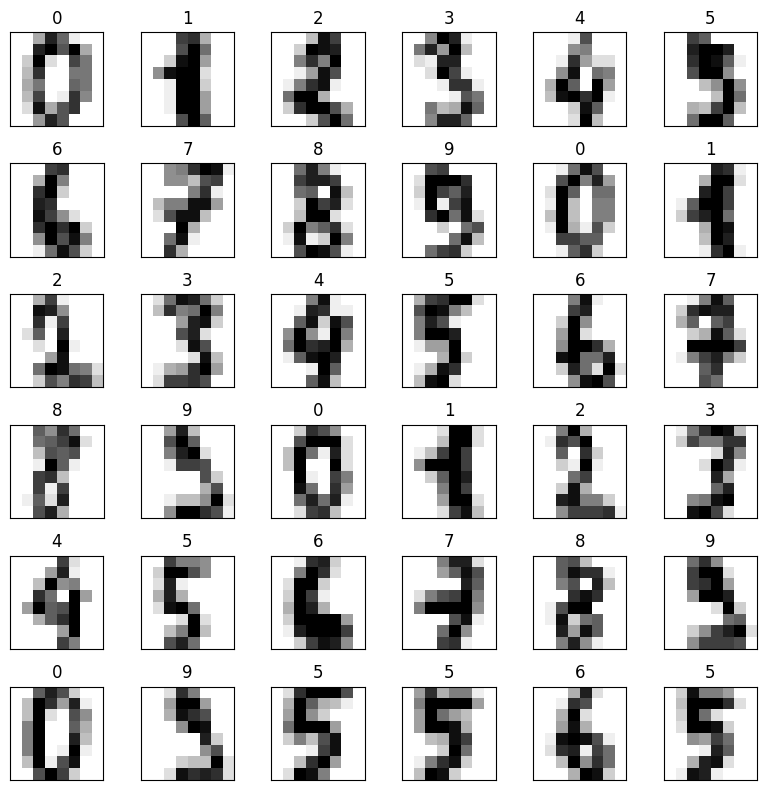

In [3]:
figure2, axes2 = plt.subplots(nrows=6, ncols=6, figsize=(8, 8))
for ax, image, label in zip(axes2.ravel(), digits.images[:36], digits.target[:36]):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)
plt.tight_layout()
plt.show()

In [4]:
# Task 2
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11, test_size=0.20)

print("Розмір навчальних даних:", X_train.shape)
print("Розмір тестових даних:", X_test.shape)

Розмір навчальних даних: (1437, 64)
Розмір тестових даних: (360, 64)


In [5]:
# Task 3
knn = KNeighborsClassifier()
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

In [6]:
# Task 4
predicted = knn.predict(X=X_test)
expected = y_test

In [7]:
# Task 5
print("Прогнозовані значення:", predicted[:20])
print("Очікувані значення:", expected[:20])

Прогнозовані значення: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
Очікувані значення: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


In [8]:
# Task 6.1
print(f'Точність моделі: {knn.score(X_test, y_test):.2%}')

Точність моделі: 98.61%


In [9]:
# Task 6.2
confusion = confusion_matrix(y_true=y_test, y_pred=predicted)
print("Матриця невідповідностей:")
print(confusion)

Матриця невідповідностей:
[[38  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  1  0  1  0  0]
 [ 0  0  0  0 40  0  0  1  0  0]
 [ 0  0  0  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  1  0  0  0  1 35]]


In [10]:
# Task 7
names = [str(digit) for digit in digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360


In [11]:
# Task 8
models = {
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC(),
    "GaussianNB": GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name}: Точність {score:.2%}")

KNeighborsClassifier: Точність 98.61%
SVC: Точність 98.61%
GaussianNB: Точність 85.56%


In [12]:
# Task 9
print("\nПідбір найкращого K:")

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(f"K = {k}: Точність = {score:.2%}")


Підбір найкращого K:
K = 1: Точність = 98.61%
K = 2: Точність = 99.44%
K = 3: Точність = 98.89%
K = 4: Точність = 98.61%
K = 5: Точність = 98.61%
K = 6: Точність = 98.06%
K = 7: Точність = 98.33%
K = 8: Точність = 98.33%
K = 9: Точність = 98.33%
K = 10: Точність = 98.06%
K = 11: Точність = 98.61%
K = 12: Точність = 97.50%
K = 13: Точність = 98.33%
K = 14: Точність = 98.06%
K = 15: Точність = 97.78%
K = 16: Точність = 97.50%
K = 17: Точність = 97.78%
K = 18: Точність = 97.22%
K = 19: Точність = 97.22%
K = 20: Точність = 97.22%
